<a href="https://colab.research.google.com/github/ArunK-ML/ML-Regression-Model---Concrete-Mix-Strength---Dataset/blob/main/Concrete_Strength_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
df = pd.read_csv("/content/Concrete_Strength_clean.csv")
df

,Unnamed: 0,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),...,Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage
0,0,Crushed,Natural,1,0.0,43.0,365,0.52,225,0,...,160,2407,21.8,26.3,0,0,0.0,0,0,0
1,1,Crushed,Natural,1,0.0,35.0,365,0.52,225,0,...,160,2403,26.3,35.3,0,0,0.0,0,0,0
2,2,Crushed,Natural,2,45.6,38.0,350,0.53,185,type SP 801 dos 1 lit,...,120,2475,32.7,44.9,0,0,0.0,0,0,0
3,3,Natural,Natural,2,57.9,38.0,340,0.49,165,Sp 432 0.9 lit,...,190,2412,30.3,41.0,0,0,0.0,0,0,0
4,4,Natural,Natural,2,19.5,38.0,325,0.51,165,sp432 dos 1.0 lit,...,170,2404,27.0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2280,Natural,Natural,2,0.0,43.0,375,0.48,180,0,...,150,2404,24.8,0.0,Natural,Natural,32.8,0,0,0
2278,2281,Natural,Natural,2,0.0,43.0,375,0.45,170,0,...,175,2404,34.7,42.3,Natural,Natural,0.0,Type Rehobuild 850 * Dos. 0.75 lit,Type Rehobuild 850,Dos. 0.75 lit
2279,2282,Crushed,Natural,2,0.0,43.0,365,0.51,185,0,...,135,2454,35.4,42.5,Crushed,Natural,30.4,Type Sp(Fdn-5) * Dos 2.5,Type Sp(Fdn-5),Dos 2.5
2280,2283,Natural,Natural,2,0.0,43.0,385,0.47,180,0,...,95,2386,25.9,0.0,Natural,Natural,42.6,0,0,0


In [172]:
df.shape

(2282, 23)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  2282 non-null   int64  
 1   Type_of_course_Aggregate                    2282 non-null   object 
 2   Type_of_Fine_Aggregate_                     2282 non-null   object 
 3   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 4   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 5   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 6   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 7   W/C_Ratio                                   2282 non-null   float64
 8   Water_Content_(Kg/m3)                       2282 non-null   int64  
 9   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 10  Total_Aggreg

In [174]:
df.drop(columns=["Unnamed: 0","Type_of_Coarse_Aggregate","Type_of_Fine_Aggregate"],inplace=True)

In [175]:
df["Target_Mean_Strength_(N/mm2)"].unique()

array([43. , 35. , 38. , 25. , 48. , 28. , 39. , 42. ,  0. , 43.1, 40.4,
       38.5])

In [176]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([1, 2, 0])

In [177]:
df["Max._Size_of_Coarse_Aggregate_(mm)"] = df["Max._Size_of_Coarse_Aggregate_(mm)"].replace({"n":"0"})

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type_of_course_Aggregate                    2282 non-null   object 
 1   Type_of_Fine_Aggregate_                     2282 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)          2282 non-null   int64  
 3   Passing_0.6_mm_Sieve_(%)                    2282 non-null   float64
 4   Target_Mean_Strength_(N/mm2)                2282 non-null   float64
 5   Cement_O.P.C_(Kg/m3)                        2282 non-null   int64  
 6   W/C_Ratio                                   2282 non-null   float64
 7   Water_Content_(Kg/m3)                       2282 non-null   int64  
 8   Additive_Type_&_Dosage_(/100_kg_of_cement)  2282 non-null   object 
 9   Total_Aggregate_(Kg/m3)                     2282 non-null   int64  
 10  Fine_Aggrega

In [179]:
df.duplicated().sum()

np.int64(1169)

In [180]:
df = df.drop_duplicates()

In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1884
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type_of_course_Aggregate                    1113 non-null   object 
 1   Type_of_Fine_Aggregate_                     1113 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)          1113 non-null   int64  
 3   Passing_0.6_mm_Sieve_(%)                    1113 non-null   float64
 4   Target_Mean_Strength_(N/mm2)                1113 non-null   float64
 5   Cement_O.P.C_(Kg/m3)                        1113 non-null   int64  
 6   W/C_Ratio                                   1113 non-null   float64
 7   Water_Content_(Kg/m3)                       1113 non-null   int64  
 8   Additive_Type_&_Dosage_(/100_kg_of_cement)  1113 non-null   object 
 9   Total_Aggregate_(Kg/m3)                     1113 non-null   int64  
 10  Fine_Aggregate_(K

In [183]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [184]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"] = df["Additive_Type_&_Dosage_(/100_kg_of_cement)"] + df["Additive_Type_&_Dos._(/100_Kg_of_cement)"]
df["Passing_0.6_mm_Sieve_(%)_Clean"] = df["Passing_0.6_mm_Sieve_(%)"] + df["Passing_0.6mm_Sieve(%)"]

/tmp/ipython-input-2929768629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"] = df["Additive_Type_&_Dosage_(/100_kg_of_cement)"] + df["Additive_Type_&_Dos._(/100_Kg_of_cement)"]
/tmp/ipython-input-2929768629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Passing_0.6_mm_Sieve_(%)_Clean"] = df["Passing_0.6_mm_Sieve_(%)"] + df["Passing_0.6mm_Sieve(%)"]


In [185]:

df = df.drop(columns=['Additive_Type_&_Dosage_(/100_kg_of_cement)',"Additive_Type_&_Dos._(/100_Kg_of_cement)"
                      ,"Passing_0.6_mm_Sieve_(%)","Passing_0.6mm_Sieve(%)"])

In [186]:
df.shape

(1113, 18)

In [187]:
df["Type_of_course_Aggregate"].unique()

array(['Crushed', 'Natural'], dtype=object)

In [188]:
df["Type_of_Fine_Aggregate_"].unique()

array(['Natural', 'Crushed'], dtype=object)

In [189]:
df["Max._Size_of_Coarse_Aggregate_(mm)"].unique()

array([1, 2, 0])

In [190]:
df['Max._Size_of_Coarse_Aggregate_(mm)'] = df['Max._Size_of_Coarse_Aggregate_(mm)'].replace({
    1 : 40,
    2 : 20,
    0 : 0
})

In [191]:
df.columns

Index(['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_',
       'Max._Size_of_Coarse_Aggregate_(mm)', 'Target_Mean_Strength_(N/mm2)',
       'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Admix_type', 'Admix_dosage',
       'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean',
       'Passing_0.6_mm_Sieve_(%)_Clean'],
      dtype='object')

In [192]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"].value_counts()

,count
Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,
00,498
0Type SP901 Dos. 1.0 lit,37
0Type SP901 * Dos 1.0 lit,33
type SP 801 dos 1 lit0,28
Sp 432 0.9 lit 0,23
...,...
0RHEOBUILD * LD80 * 3250 ML/m3,1
0Type Euro 8600* Dos. 1.0 lit,1
0Type Rehobuild 850 * Dos. 1.4 lit,1


In [193]:
df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"] = df["Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean"].replace({ "00" :"No Dosage"})

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1884
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Type_of_course_Aggregate                          1113 non-null   object 
 1   Type_of_Fine_Aggregate_                           1113 non-null   object 
 2   Max._Size_of_Coarse_Aggregate_(mm)                1113 non-null   int64  
 3   Target_Mean_Strength_(N/mm2)                      1113 non-null   float64
 4   Cement_O.P.C_(Kg/m3)                              1113 non-null   int64  
 5   W/C_Ratio                                         1113 non-null   float64
 6   Water_Content_(Kg/m3)                             1113 non-null   int64  
 7   Total_Aggregate_(Kg/m3)                           1113 non-null   int64  
 8   Fine_Aggregate_(Kg/m3)                            1113 non-null   int64  
 9   Coarse_Aggregate_(Kg/m3)

In [195]:
df.to_csv("Concrete_Strength_clean2")

# **Encoder**

In [196]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i] = df[i].astype(str) # Convert to string before encoding
  df[i] = code.fit_transform(df[i])

# **Correlation testing**

In [197]:
corr_matrix = df.corr()
corr_matrix

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,Passing_0.6_mm_Sieve_(%)_Clean
Type_of_course_Aggregate,1.000000,0.092961,0.516137,-0.087336,-0.245210,-0.367769,-0.556616,-0.230031,-0.360782,0.264692,0.007058,-0.009536,-0.156966,-0.045721,-0.050997,0.011290,0.048037,0.029514
Type_of_Fine_Aggregate_,0.092961,1.000000,-0.033515,0.057871,0.031686,-0.150882,-0.099858,-0.009080,-0.156087,0.091533,0.030619,0.000003,-0.037854,-0.010450,0.046658,-0.038755,-0.034652,0.008120
Max._Size_of_Coarse_Aggregate_(mm),0.516137,-0.033515,1.000000,-0.051101,-0.147059,-0.189123,-0.311902,-0.124628,-0.379733,0.303117,-0.167675,0.009043,-0.165052,-0.055159,-0.079995,0.047820,0.073879,0.035127
Target_Mean_Strength_(N/mm2),-0.087336,0.057871,-0.051101,1.000000,0.470692,-0.384560,-0.007486,-0.182459,-0.059828,0.085422,0.205726,-0.016415,0.247996,0.065069,0.503587,-0.428566,-0.469707,0.028201
Cement_O.P.C_(Kg/m3),-0.245210,0.031686,-0.147059,0.470692,1.000000,-0.413470,0.289912,-0.419971,-0.128480,-0.017099,0.146628,-0.012339,0.181610,0.043851,0.310123,-0.252352,-0.354698,-0.012458
W/C_Ratio,-0.367769,-0.150882,-0.189123,-0.384560,-0.413470,1.000000,0.556099,0.187884,0.118841,-0.128065,-0.349157,0.037701,-0.245950,-0.059496,-0.424743,0.387398,0.401675,-0.016312
Water_Content_(Kg/m3),-0.556616,-0.099858,-0.311902,-0.007486,0.289912,0.556099,1.000000,-0.113489,0.027795,-0.163045,-0.187887,0.019359,-0.073605,-0.018594,-0.171738,0.160966,0.097463,-0.019808
Total_Aggregate_(Kg/m3),-0.230031,-0.009080,-0.124628,-0.182459,-0.419971,0.187884,-0.113489,1.000000,0.280308,-0.068200,0.003750,0.009584,0.053645,-0.016483,0.011988,-0.004261,0.083303,-0.011080
Fine_Aggregate_(Kg/m3),-0.360782,-0.156087,-0.379733,-0.059828,-0.128480,0.118841,0.027795,0.280308,1.000000,-0.559702,0.202081,-0.009955,0.147021,0.053862,0.112753,-0.024428,0.008144,-0.041161
Coarse_Aggregate_(Kg/m3),0.264692,0.091533,0.303117,0.085422,-0.017099,-0.128065,-0.163045,-0.068200,-0.559702,1.000000,-0.092960,0.009204,-0.098855,-0.052135,0.024258,-0.048474,-0.096170,0.026156


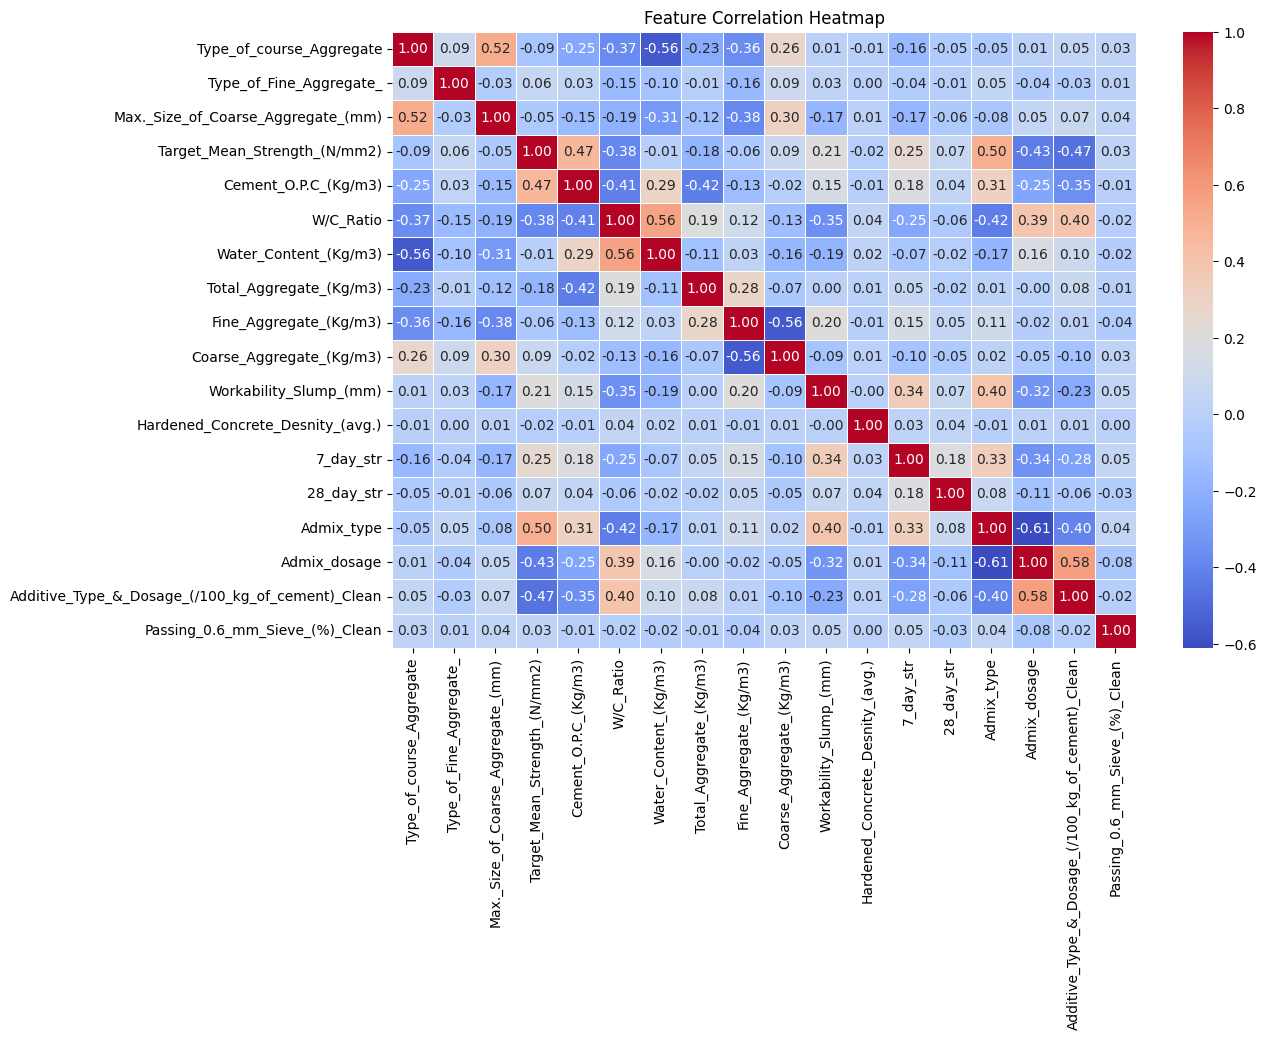

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# **Hypothesis testing**

In [199]:
df.columns

Index(['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_',
       'Max._Size_of_Coarse_Aggregate_(mm)', 'Target_Mean_Strength_(N/mm2)',
       'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Admix_type', 'Admix_dosage',
       'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean',
       'Passing_0.6_mm_Sieve_(%)_Clean'],
      dtype='object')

In [200]:
continous = [
       'Target_Mean_Strength_(N/mm2)','Passing_0.6_mm_Sieve_(%)_Clean',
       'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str'
       ]


catergory = [
        'Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_','Max._Size_of_Coarse_Aggregate_(mm)',
        'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean','Admix_type', 'Admix_dosage'
]

In [201]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [202]:

#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False


In [203]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [204]:
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else: # Add an else condition to handle cases not covered by the above conditions
          result = False # Or assign a default value based on your logic
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [205]:
final_df = pd.DataFrame(final)
final_df

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,Passing_0.6_mm_Sieve_(%)_Clean
Type_of_course_Aggregate,1,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1
Type_of_Fine_Aggregate_,1,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,1
Max._Size_of_Coarse_Aggregate_(mm),1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
Target_Mean_Strength_(N/mm2),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Cement_O.P.C_(Kg/m3),0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
W/C_Ratio,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Water_Content_(Kg/m3),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Total_Aggregate_(Kg/m3),0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
Fine_Aggregate_(Kg/m3),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Coarse_Aggregate_(Kg/m3),0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


<Axes: >

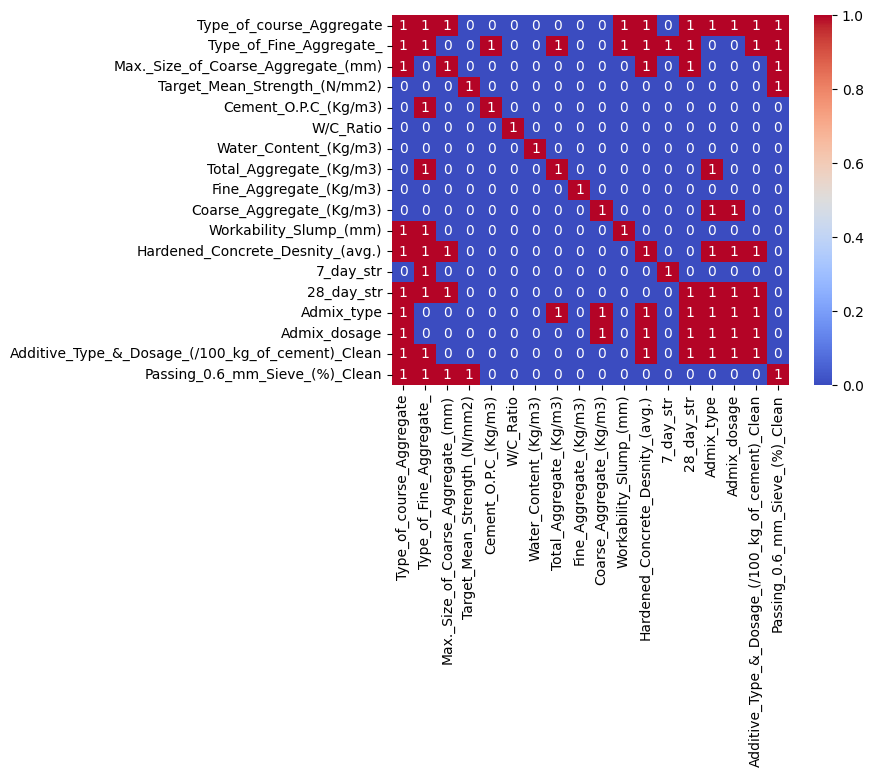

In [206]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [207]:
df

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,Passing_0.6_mm_Sieve_(%)_Clean
0,0,1,40,43.0,365,0.52,225,1870,710,1160,160,2407,21.8,26.3,2,57,152,0.0
1,0,1,40,35.0,365,0.52,225,1870,710,1160,160,2403,26.3,35.3,2,57,152,0.0
2,0,1,20,38.0,350,0.53,185,1915,725,1190,120,2475,32.7,44.9,2,57,205,45.6
3,1,1,20,38.0,340,0.49,165,1895,835,1060,190,2412,30.3,41.0,2,57,162,57.9
4,1,1,20,38.0,325,0.51,165,1910,840,1070,170,2404,27.0,0.0,2,57,203,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,1,40,43.0,375,0.48,180,1845,700,1140,100,2404,22.4,0.0,2,57,152,14.9
1543,1,1,40,43.0,375,0.48,180,1845,700,1140,100,2396,22.4,29.1,2,57,152,14.9
1544,0,1,40,43.0,375,0.48,180,1845,685,1160,180,2405,26.1,0.0,90,57,133,14.7
1545,0,1,40,43.0,375,0.48,180,1845,685,1160,180,2405,26.1,30.0,90,57,133,14.7


# **Train the model ML**

In [208]:
df.columns

Index(['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_',
       'Max._Size_of_Coarse_Aggregate_(mm)', 'Target_Mean_Strength_(N/mm2)',
       'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)',
       'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)',
       'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)',
       'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str',
       'Admix_type', 'Admix_dosage',
       'Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean',
       'Passing_0.6_mm_Sieve_(%)_Clean'],
      dtype='object')

In [209]:
y = df['28_day_str']
x = df.drop("28_day_str",axis=1)

In [210]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((834, 17), (279, 17), (834,), (279,))

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

23.533647252090798
5.098778351286478e+16
627.6693854622312
-0.6204154923741838


In [212]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4).fit(df)

In [213]:
group = model.predict(df)
group

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [214]:
df["group"]= group

In [215]:
df

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,Passing_0.6_mm_Sieve_(%)_Clean,group
0,0,1,40,43.0,365,0.52,225,1870,710,1160,160,2407,21.8,26.3,2,57,152,0.0,0
1,0,1,40,35.0,365,0.52,225,1870,710,1160,160,2403,26.3,35.3,2,57,152,0.0,0
2,0,1,20,38.0,350,0.53,185,1915,725,1190,120,2475,32.7,44.9,2,57,205,45.6,0
3,1,1,20,38.0,340,0.49,165,1895,835,1060,190,2412,30.3,41.0,2,57,162,57.9,0
4,1,1,20,38.0,325,0.51,165,1910,840,1070,170,2404,27.0,0.0,2,57,203,19.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,1,40,43.0,375,0.48,180,1845,700,1140,100,2404,22.4,0.0,2,57,152,14.9,0
1543,1,1,40,43.0,375,0.48,180,1845,700,1140,100,2396,22.4,29.1,2,57,152,14.9,0
1544,0,1,40,43.0,375,0.48,180,1845,685,1160,180,2405,26.1,0.0,90,57,133,14.7,0
1545,0,1,40,43.0,375,0.48,180,1845,685,1160,180,2405,26.1,30.0,90,57,133,14.7,0


In [216]:
df["group"].value_counts()

,count
group,
0,1075
3,36
1,1
2,1


In [217]:
pd.set_option("display.max_rows",None)

In [218]:
df

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Admix_type,Admix_dosage,Additive_Type_&_Dosage_(/100_kg_of_cement)_Clean,Passing_0.6_mm_Sieve_(%)_Clean,group
0,0,1,40,43.0,365,0.52,225,1870,710,1160,160,2407,21.8,26.3,2,57,152,0.00,0
1,0,1,40,35.0,365,0.52,225,1870,710,1160,160,2403,26.3,35.3,2,57,152,0.00,0
2,0,1,20,38.0,350,0.53,185,1915,725,1190,120,2475,32.7,44.9,2,57,205,45.60,0
3,1,1,20,38.0,340,0.49,165,1895,835,1060,190,2412,30.3,41.0,2,57,162,57.90,0
4,1,1,20,38.0,325,0.51,165,1910,840,1070,170,2404,27.0,0.0,2,57,203,19.50,0
5,1,1,20,38.0,325,0.51,165,1910,840,1070,170,2405,27.0,35.4,2,57,203,19.50,0
6,0,1,20,38.0,340,0.56,190,1895,795,1100,105,2425,31.8,0.0,2,57,202,39.40,0
7,0,1,20,38.0,340,0.56,190,1895,795,1100,105,2427,31.8,41.3,2,57,202,39.40,0
8,0,1,20,38.0,370,0.50,185,1895,795,1100,125,2449,37.8,46.4,2,57,195,33.40,0
9,0,1,20,38.0,360,0.53,190,1900,780,1120,100,2454,28.2,34.1,2,57,152,26.10,0
